In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("imdb_movie_data_2023.csv")
data.head()

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


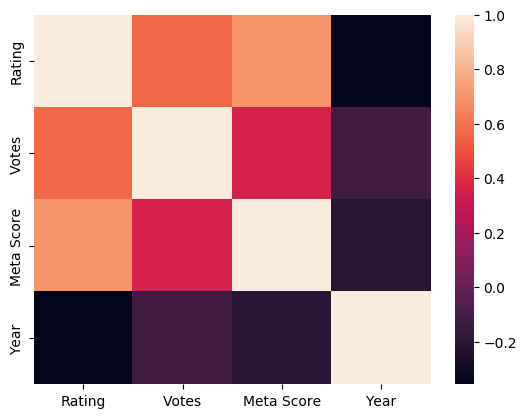

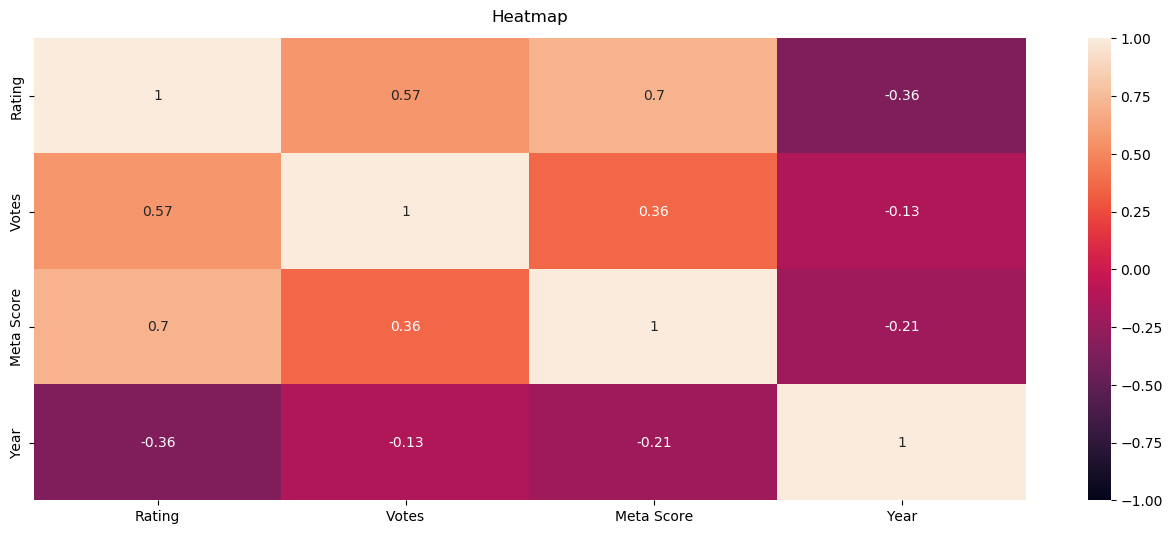

In [3]:
sns.heatmap(data.corr());
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Heatmap', fontdict={'fontsize':12}, pad=12);

In [4]:
# Hapus kolom yang tidak diperlukan
kolom_yg_dihapus = ['Genre', 'PG Rating', 'Duration', 'Cast', 'Director', 'Movie Name', 'Year']
data = data.drop(kolom_yg_dihapus, axis=1)

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
print("DataFrame setelah penghapusan kolom: ")
print(data.head())

DataFrame setelah penghapusan kolom: 
   Rating     Votes  Meta Score
0     6.5   90000.0        67.0
1     7.4   24000.0        66.0
2     8.5    6700.0        86.0
3     7.8  128000.0        89.0
4     7.0   21000.0        85.0


In [5]:
# Ya dalem datanya ada beberapa NA jd di hapus aja
data = data.dropna(subset=['Rating', 'Meta Score', 'Votes'])
print(data)

      Rating     Votes  Meta Score
0        6.5   90000.0        67.0
1        7.4   24000.0        66.0
2        8.5    6700.0        86.0
3        7.8  128000.0        89.0
4        7.0   21000.0        85.0
...      ...       ...         ...
1944     6.3   22000.0        67.0
1945     7.1  172000.0        59.0
1946     7.6  198000.0        79.0
1947     6.5   71000.0        46.0
1949     7.1  203000.0        65.0

[1827 rows x 3 columns]


In [6]:
# Buat label rekomendasi
def convert_to_recommendation(rating):
    return 1 if rating >= 7 else 0  # 1 untuk "Recommended", 0 untuk "Not Recommended"

data['Recommendation'] = data['Rating'].apply(convert_to_recommendation)

# Persiapkan Data
scaler=MinMaxScaler()
X = data[['Meta Score', 'Votes']]  # Fitur
y = data['Recommendation']  # Target
# Bagi Data menjadi Training, Validation, dan Test Set
X=scaler.fit_transform(X)
# 60% training, 40% sisanya untuk validation dan test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# Dari 40% sisanya, 50% untuk validation dan 50% untuk test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Periksa jumlah data di setiap set
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 1096 samples
Validation set: 365 samples
Test set: 366 samples


In [7]:
# Inisialisasi Model Random Forest
rf_model = RandomForestClassifier()
# Latih Model Random Forest
rf_model.fit(X_train, y_train)
# Validasi Model Random Forest
y_val_pred_rf = rf_model.predict(X_val)
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print(f'Akurasi Validasi Random Forest: {accuracy_val_rf}')
# Evaluasi Model Random Forest
y_test_pred_rf = rf_model.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Akurasi Test Random Forest: {accuracy_test_rf}')



Akurasi Validasi Random Forest: 0.7616438356164383
Akurasi Test Random Forest: 0.7841530054644809


In [8]:
# Inisialisasi Model Regresi Logistik
lr_model = LogisticRegression()
# Latih Model Regresi Logistik
lr_model.fit(X_train, y_train)
# Validasi Model Regresi Logistik
y_val_pred_lr = lr_model.predict(X_val)
accuracy_val_lr = accuracy_score(y_val, y_val_pred_lr)
print(f'Akurasi Validasi Regresi Logistik: {accuracy_val_lr}')
# Evaluasi Model Regresi Logistik
y_test_pred_lr = lr_model.predict(X_test)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
print(f'Akurasi Test Regresi Logistik: {accuracy_test_lr}')

Akurasi Validasi Regresi Logistik: 0.7753424657534247
Akurasi Test Regresi Logistik: 0.7786885245901639


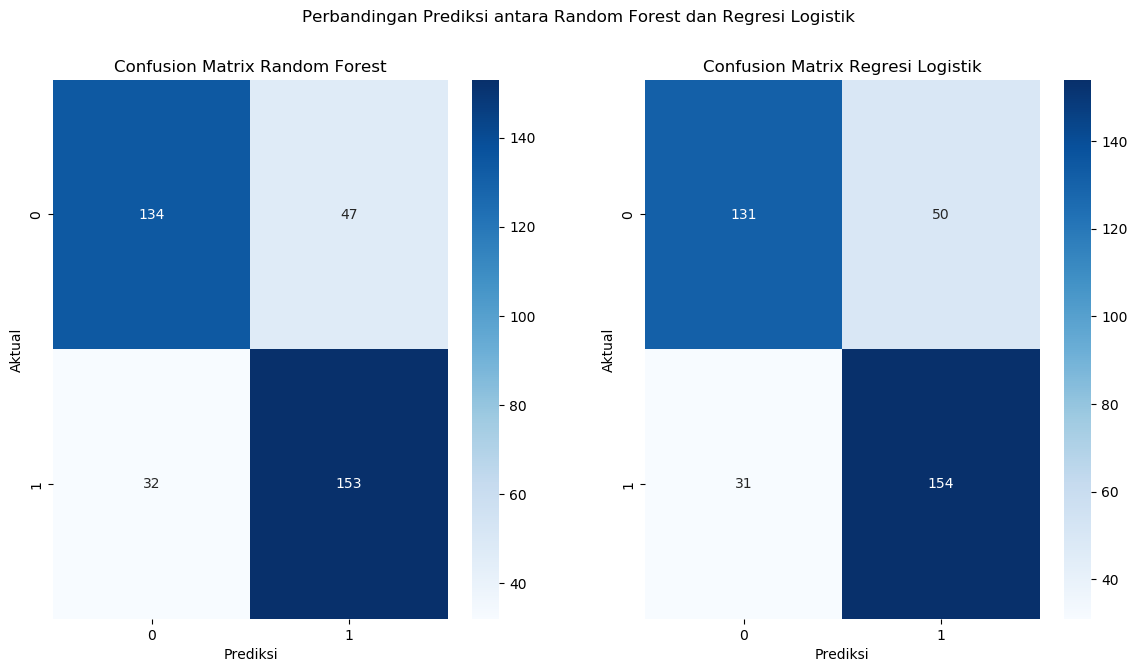

Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       181
           1       0.77      0.83      0.79       185

    accuracy                           0.78       366
   macro avg       0.79      0.78      0.78       366
weighted avg       0.79      0.78      0.78       366

Laporan Klasifikasi Regresi Logistik:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       181
           1       0.75      0.83      0.79       185

    accuracy                           0.78       366
   macro avg       0.78      0.78      0.78       366
weighted avg       0.78      0.78      0.78       366



In [9]:
# Plotting hasil prediksi
plt.figure(figsize=(14, 7))

# Plot hasil prediksi Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# Plot hasil prediksi Regresi Logistik
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Regresi Logistik')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.suptitle('Perbandingan Prediksi antara Random Forest dan Regresi Logistik')
plt.show()

# Print laporan klasifikasi untuk kedua model
print("Laporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_test_pred_rf))

print("Laporan Klasifikasi Regresi Logistik:")
print(classification_report(y_test, y_test_pred_lr))